# COGS 108 - Final Project 

# Overview

Our project goal was to identify the most relevant categories for potential candidates to study to have the best shot at winning on the game show, Jeopardy. We used a dataset with over 200,000 observations and over 20,000 individual categories. After analyzing our data, we came to the conclusion that with the data and information we had, we were not able to create a comprehensive list of top categories a potential candidate could study to have a higher chance of success at Jeopardy.

# Names

- Patricia Chang
- Samantha Cheung
- Marcus Martinez
- Gavin Tran


# Research Question

For someone who is new to Jeopardy, can we determine the most relevant categories for them to study?

## Background and Prior Work

An explanation on the history of Jeopardy:
- Jeopardy is the longest-running American television game show and to this day still attracts people of all ages. Jeopardy is a trivia game show in the form of answer-question. An answer is provided and the contestant has to ask a question that correlates to the given answer. From host Alex Trebek being diagnosed with stage 4 pancreatic cancer to one of our own UCSD undergraduate students representing us in the 2020 Jeopardy College Bowl, this show has resonated with many people across the nation.
- In each Jeopardy episode, three contestants compete in three rounds to earn the most money by correctly asking questions that correspond with the given answer clue. If a contestant answers a clue correctly, the amount associated with that clue gets added to their total, but if they answer incorrectly, the amount is subtracted. During the first round of Jeopardy, there are six different categories introduced, with five questions in each category that are worth $200-$1,000. The next round, called Double-Jeopardy, introduces six new categories, with five questions in each category that are now worth $400-$2,000. For the final round, contestants are shown a new category and make wagers to their current earnings before seeing the clue. The clue is then revealed and contestants have sixty seconds to answer. The answers are read out loud and the amount that the contestant wagered is either added or subtracted from his/her total depending on whether or not his/her answer is correct. 
- The thirteen categories that appear in each episode of Jeopardy are known to cover a wide range of topics from ancient history to pop culture to English grammar. In order to garner the most points, contestants need to be experts in any possible topic that could show up as a category. 

Relevance to general population, how to actually apply to play and benefits:
- To apply to be a contestant of the show, one has to meet minimum eligibility requirements, such as being at least 18 years old and not having appeared as a contestant before, in addition to passing the Jeopardy! Test. If you meet the aforementioned requirements you are then placed in a random selection process to attend an audition. After auditioning, you could be selected to be a contestant on the show up; attending an audition does not guarantee a chance of competing on the show. 
https://www.jeopardy.com/be-on-j/faqs#faq_section_1291

http://j-archive.com/
- J-archive is a fan made archive of Jeopardy questions. This archive covers every question in each season of Jeopardy up to the most recent episode, showing the value, category and contestants for that episode. There are no specific findings on this site.

https://jeopardyquestions.com
- Similar to J-archive, jeopardyquestions.com is a fan-sourced archive of Jeopardy questions and answers which is updated daily. It offers a list of questions and popular categories but there is no information offered about the air date, frequency or value of each question.

https://public.tableau.com/shared/DDBHN4YGP?:display_count=yes&:showVizHome=no
- This is a table found online which utilizes J-archive to analyse the most common questions and answers. This table is similar to what we are trying to achieve in our dataset, though this table only goes up to 2012 so data may differ. At the time this was made, the most popular answers were China and Australia, and the most popular categories were “Before & After” and “Science”.


# Hypothesis


We hypothesize that there are specific topics more frequently asked, and that by studying these topics more, it can increase a competitor’s likelihood of winning. Based on existing episodes of Jeopardy, there may be a trend of recurring topics such as the Bible, the periodic table, American history, geography, popular trends, etc. 

Using this knowledge, we thought it would be interesting to analyze Jeopardy categories from past episodes to find the top categories which a potential candidate would study to have a higher chance at success in the game.

# Dataset(s)

- Dataset Name: JEOPARDY_CSV.csv
- Link to the dataset: https://www.kaggle.com/tunguz/200000-jeopardy-questions
- Number of observations: 216930 

> We are using a dataset from Kaggle, with the file name JEOPARDY_CSV.csv that includes the airdate, episode number, question, answer, category, value for each clue, and round the clue appeared in for episodes of Jeopardy that aired from 1984 to 2012. This dataset has 216,930 observations


# Setup

In [1]:
# imports
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Cleaning

First we read in the jeopardy dataset and stored it in __csv_data__. We decided to drop the __Show Number__ category because we did not need to know the specific episode number when analyzing popular categories. We also decided to drop the __Round__ column because there would always be six categories in either round of Jeopardy and we took into account all categories in an episode. 

Renamed columns in dataset to be consistent: Because Jeopardy is a Answer-Question formatted show, the label for __Question__ corresponded to the correct response and __Answer__ corresponded to the clue given to the contestant. We thought that these labels were difficult to quickly understand so we switched the column names to be more comprehensive.

In [2]:
csv_data = pd.read_csv('JEOPARDY_CSV.csv')

In [3]:
csv_data = csv_data.drop(['Show Number',' Round',],axis=1)

csv_data = csv_data.rename(
    {
     ' Air Date':'Air Date',
     ' Category':'Category',
     ' Question':'Question',
     ' Answer':'Answer',
     ' Value':'Value'
    },axis=1)

In [4]:
# Reorder columns and sort
csv_data = csv_data[['Air Date','Category','Question','Answer','Value']]

To clean the __Value__ column we removed missing values and removed dollar signs and commas.

In [5]:
csv_data['Value'].head()

0    $200
1    $200
2    $200
3    $200
4    $200
Name: Value, dtype: object

In [6]:
#Clean values to remove nulls, dollar signs and values with commas. Also casts the values to integers.
csv_data['Cleaned_Values'] = csv_data['Value'].replace('None', np.nan)
csv_data = csv_data.drop(['Value'], axis=1).dropna()
csv_data['Cleaned_Values'] = csv_data['Cleaned_Values'].str.replace('$', '').str.replace(',', '').astype(int)

To clean the __Air Date__ column we changed the strng variation of the date into the year, then we made a column for the corresponding decade.

In [7]:
# Change the string variation of date into the year
csv_data['Air Date'] = csv_data['Air Date'].apply(lambda x: int(x[0:4]))

In [8]:
# Func to place each year in correct decade
def fix_years(yr):
    if (yr >= 1984) & (yr <= 1989):
        return 0
    elif (yr >= 1990) & (yr <= 1999):
        return 1
    elif (yr >= 2000) & (yr <= 2009):
        return 2
    elif (yr >= 2010) & (yr <= 2012):
        return 3

### A Quick Look At Categories by Year

Before we start analyzing the data, we'll take a look at the amount of categories per year using the code below.

In [9]:
# This function returns the common Jeopardy categories between year 1 and year 2(interval)

# common categories between year 1 and year 2
def common_cats(year1, year2):
    cats1 = list(csv_data[csv_data['Air Date'] == year1]['Category'].unique()) # get list of categories in year 1
        
    for yearX in range(year1,year2 + 1):
        cats2 = list(csv_data[csv_data['Air Date'] == yearX]['Category'].unique()) # get list of categories in year 2
        cats1 = [value for value in cats1 if value in cats2] # intersect year 1 and year 2 categories
    
    return cats1

Using the __common_cats__ function, we can identify the number of categories that carry over from one year to the next in comparison to the amount of categories that appeared that year.

In [10]:
total_categories = [] # array: each index represents a year, each element equals categories in that year
for i in range(1984,2013):
    total_categories.append(len(csv_data[csv_data['Air Date'] == i]['Category'].unique())) # append number of unique categories

carry_overs = [0] # array: each index represents a year, each element equals categories that carried over to the next year
for i in range(1984,2012):
    carry_overs.insert(0, len(common_cats(i,i+1))) # prepend number of carry over categories

Text(0.5, 0, 'Year')

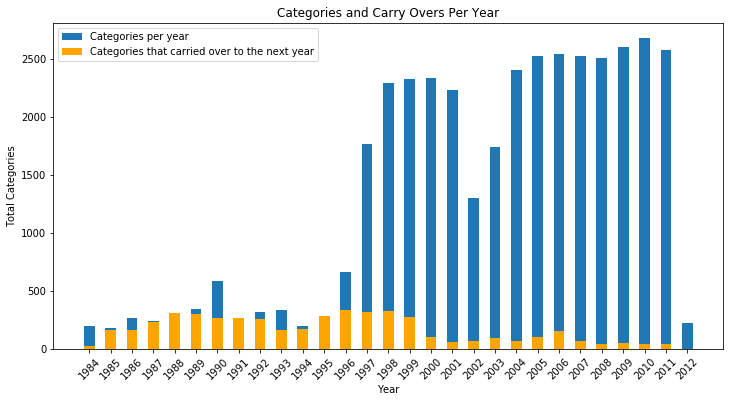

In [11]:
# visualize
years = range(1984,2013)
legend=['Categories per year','Categories that carried over to the next year']
fig, ax = plt.subplots(figsize = [12,6])
ax.bar(years, total_categories, width = .5)
ax.bar(years, carry_overs, color='orange', width = .5)
ax.set_xticks(years)
ax.tick_params(axis='x',labelrotation=45)
ax.legend(legend,loc='upper left')
ax.set_title('Categories and Carry Overs Per Year')
ax.set_ylabel('Total Categories')
ax.set_xlabel('Year')

- On the x-axis we have the year and on the y-axis we have the amount of categories.
- The blue bars represent the total number of categories that appeared that year.
- The overlapping yellow bars represents "Carry Over" categories, which are categories that appeared in that year and reappeared the following year.

In [12]:
print('Average number of categories that carried over:\t', np.mean(carry_overs[:-1]),'\n')
print('Categories that appeared every year between 1984 and 1996:', len(common_cats(1984,1996)), '\n', common_cats(1984,1996), '\n')
print('Categories that appeared every year between 1997 and 2011:', len(common_cats(1997,2011)), '\n', common_cats(1997,2011), '\n')
print('Common categories between 1984 and 2012:', len(common_cats(1984,2011)), '\n', common_cats(1984,2011))

Average number of categories that carried over:	 167.89285714285714 

Categories that appeared every year between 1984 and 1996: 1 
 ['ISLANDS'] 

Categories that appeared every year between 1997 and 2011: 11 
 ['COMMON BONDS', '4-LETTER WORDS', 'RHYME TIME', '10-LETTER WORDS', 'COLLEGES & UNIVERSITIES', 'SCIENCE', 'BEFORE & AFTER', 'ANNUAL EVENTS', 'STUPID ANSWERS', 'OPERA', 'CLASSICAL MUSIC'] 

Common categories between 1984 and 2012: 0 
 []


Using the __common_cats__ function made earlier, we can see there is only 1 common category from 1984 to 1996, 11 common categories from 1997 to 2011, and no common categories between 1984 and 2012. We see that the majority of categories that do carry over are __not__ the same. Additionally, this shows that a large amount of unique categories are introduced every year. An approach to dealing with a number of unique categories would be to relabel each of them by identifying key-words in the category name.

In [13]:
print('Number of unique categories: ', len(csv_data['Category'].unique()))

Number of unique categories:  26951


### Extensive labeling is BAD:

After looking into the dataset, there are too many different categories and there are new categories being made every year that are never repeated again, the generalized categories would not encompass these new ones. We decided not to use this relabeling approach because it would bias our dataset based on which keywords we looked for within the questions. Even if we looked at the top categories, the number of top categories would only make up a small portion of the total number of categories. By labeling categories ourselves, we could be generalizing too much and reorganizing questions that may not fall under the proper categories. If new categories were being created every year, we were worried that a relabeling approach would not be able to catch everything, therefore deciding to use the original Jeopardy categories given. We do some attempt of this later in the data analysis.

# Data Analysis & Results

For Data Analysis, we initially wanted to use TF-IDF / Bag of Words on the categories and questions columns, trying to see if we could accurately label the question to the category. A few issues that made us stray away from this path is similar to something we previously stated where each year has new unique categories which drastically affects the accuracy of our model. Fixing this issue in itself another problem because any form of relabelling approaches again leads to generalizability issues where our findings and methods of relabelling will not work for any other Jeopardy dataset.

In [14]:
# Basic labeling to potentially capture more history labels
def label(label):

    if ('HIST' in label):
        return 'HISTORY'

    else:
        return label

In [15]:
# Apply the previous function to our Category column
csv_data['Category'] = csv_data['Category'].apply(label)

In [16]:
def hist_finder(x):
    if x== 'HISTORY':
        return 1
    return 0

csv_data['HIST'] = csv_data['Category'].apply(hist_finder)

In [17]:
# Apply the previous function to our Category column
csv_data.groupby('Category')['Cleaned_Values'].sum().sort_values(ascending = False)

Category
HISTORY                   3579144
BEFORE & AFTER             491900
SCIENCE                    361221
LITERATURE                 344900
OPERA                      254300
                           ...   
LIONS & TIGERS & BEARS        100
PLACES YOU FLY OVER           100
HOORAY FOR HOLLYWOOD          100
ALL ABOUT CORN                100
HAND SIGNALS                  100
Name: Cleaned_Values, Length: 26570, dtype: int64

In [18]:
#Hypothesis testing using difference in means
n_repetitions = 500

means = []
for i in range(n_repetitions):
    #Shuffling the Cleaned Values column
    shuffled_col = (
        csv_data['Cleaned_Values']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    
    #Put the shuffled values into a table
    shuffled = (
        csv_data
        .assign(**{
            'Category': shuffled_col,
            'not_hist': csv_data['HIST'] == 0
        })
    )
    
    
    # compute the differences in means
    mean = shuffled.groupby('not_hist')['Cleaned_Values'].mean().diff().abs().iloc[-1]
    means.append(mean)


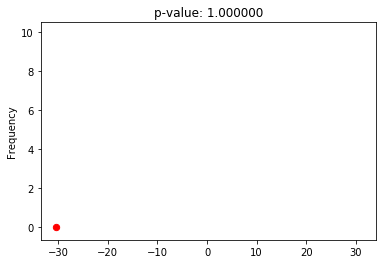

In [19]:
# Get our observed value and p value
obs = csv_data.loc[csv_data['HIST'] != 0]['Cleaned_Values'].mean() - csv_data.loc[csv_data['HIST'] == 0]['Cleaned_Values'].mean()
pval = np.mean(np.array(means) > obs)
pd.Series(means).plot(kind='hist', density=True, alpha=0.8, title='p-value: %f' % pval)
plt.scatter(obs, 0, color='red', s=40);

We cannot reject the null hypothesis that the differences in our observed distribution of history in the Categories column compared to our sampled distribution is due to chance. Which is exactly what we expect, given that the nature of Jeopardy places a value of 100-500 for regular Jeopardy questions and 200-1000 for Double Jeopardy.

In [20]:
csv_data['Cleaned_Values'].value_counts()

400     42243
800     31860
200     30454
1000    21640
600     20377
        ...  
585         1
9800        1
2127        1
4300        1
3201        1
Name: Cleaned_Values, Length: 145, dtype: int64

Looking at this output, we just chose the first option out of the bottom 5

Singling out “varmints” to show how obscure some categories could be and that it would be difficult to generalize a group of categories that could encompass all

In [21]:
csv_data[csv_data['Category'] == 'VARMINTS']

,Air Date,Category,Question,Answer,Cleaned_Values,HIST
45980,2008,VARMINTS,A porky isn't a pig but this rodent that you d...,a porcupine,400,0
45986,2008,VARMINTS,If this U.S. marsupial keeps getting into my g...,a possum,800,0
45992,2008,VARMINTS,"<a href=""http://www.j-archive.com/media/2008-0...",a woodpecker,1200,0
45998,2008,VARMINTS,These nocturnal ringtailed mammals find that a...,raccoons,1600,0
46004,2008,VARMINTS,"It's also called a brush wolf, & I can't forgi...",a coyote,2000,0
184442,1999,VARMINTS,This close relative of the lynx lives in North...,Bobcat,200,0
184448,1999,VARMINTS,"This wily ""brush wolf"", long a nuisance to ran...",Coyote,400,0
184454,1999,VARMINTS,"A member of the squirrel family, this rodent g...",Prairie dog,585,0
184460,1999,VARMINTS,"There's a ""hairy"" as well as a ""spiny"" type of...",Hedgehog,800,0
184466,1999,VARMINTS,The long-tailed is the common U.S. species of ...,Weasel,1000,0


In [22]:
def vmts(x):
    if x == 'VARMINTS':
        return 1
    return 0

csv_data['Vmts'] = csv_data['Category'].apply(vmts)

In [23]:
#Hypothesis testing using difference in means
n_repetitions = 500

means = []
for i in range(n_repetitions):
    #Shuffling the Cleaned Values column
    shuffled_col = (
        csv_data['Cleaned_Values']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    
    #Put the shuffled values into a table
    shuffled = (
        csv_data
        .assign(**{
            'Category': shuffled_col,
            'not_vmts': csv_data['Vmts'] == 0
        })
    )

    # compute the differences in means
    mean = shuffled.groupby('not_vmts')['Cleaned_Values'].mean().diff().abs().iloc[-1]
    means.append(mean)

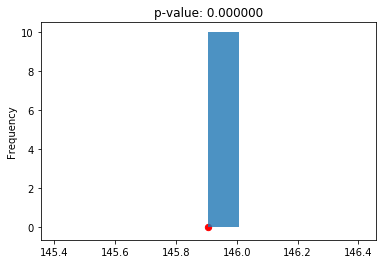

In [24]:
#Get our observed value and p value, then plot the difference in means 

obs = csv_data.loc[csv_data['Vmts'] != 0]['Cleaned_Values'].mean() - csv_data.loc[csv_data['Vmts'] == 0]['Cleaned_Values'].mean()
pval = np.mean(np.array(means) > obs)
pd.Series(means).plot(kind='hist', density=True, alpha=0.8, title='p-value: %f' % pval)
plt.scatter(obs, 0, color='red', s=40);

We reject the null hypothesis stating that the difference in the distribution of our observed categories of Varmints compared to the sampled variation is due to chance, meaning the difference is not due to chance but to a specific cause. This is expected given that the nature of Jeopardy places a value of 100-500 for regular Jeopardy questions and 200-1000 for Final Jeopardy, but in this case Varmints is also affected by the Final Jeopardy portion, with one recorded value of 585. The ambiguity of dealing with Final Jeopardy questions is that any value between 0 and the maximum amount that the player currently holds can be placed. With this in mind, if a player places anything that’s not in the range of 100-1000 as well as without 0’s in the tens and ones places, then this trend will always pursue due to how large our dataset is and how each double jeopardy question most likely has a unique value in every show. In other words, this means that we are comparing hundreds of thousands of values between 100-1000 with a single random value.

#### A Relabeling Attempt

If we went with the general labeling approach, the top categories to study would be generalized as religion, sports, television, travel, music, art, movies, culture, shakespeare, american literature, world literature, philosophy, american government, world government, politics, business, war, american history, nth century history, world history, 20s to 90s, mythology, presidents, american people, people, american geography, world geography, food, math, science, weather, animals, education, american trivia, quotes and phrases, quotational categories, n-letter words, world play, vocab and grammar, holidays, world trivia.

In [25]:
# Create a fresh dataframe of the csv data
csv_data = pd.read_csv('JEOPARDY_CSV.csv')

In [26]:
csv_data = csv_data.drop(['Show Number',' Round',],axis=1)

csv_data = csv_data.rename(
    {
     ' Air Date':'Air Date',
     ' Category':'Category',
     ' Question':'Question',
     ' Answer':'Answer',
     ' Value':'Value'
    },axis=1)

In [27]:
# Reorder columns and sort
csv_data = csv_data[['Air Date','Category','Question','Answer','Value']]

Below is an extensive relabeling function to sort categories into general categories.

In [28]:
regions = [ 'istan', 'asian', 'europe', 'africa', 'australia', 'albania', 'andorra', 'angola', 'antarctica', 'argentina', 'armenia', 'australia', 'austria', 'bahamas', 'bahrain', 'bangladesh', 'belarus', 'belgium', 'belize', 'bermuda', 'bhutan', 'bolivia', 'botswana', 'brazil', 'bulgaria', 'cambodia', 'cameroon', 'canada', 'chad', 'chile', 'china', 'colombia', 'congo', 'croatia', 'cuba', 'cyprus', 'czech republic', 'denmark', 'djibouti', 'east timor', 'ecuador', 'egypt', 'estonia', 'ethiopia', 'finland', 'france', 'georgia', 'germany', 'ghana', 'greece', 'greek', 'greenland', 'haiti', 'hong kong', 'hungary', 'iceland', 'india', 'indonesia', 'iraq', 'ireland', 'italy', 'jamaica', 'japan', 'jordan', 'kazakhstan', 'kenya', 'kyrgyzstan', 'laos', 'latvia', 'libya', 'liechtenstein', 'lithuania', 'luxembourg', 'madagascar', 'malawi', 'malaysia', 'mali', 'malta', 'mexico', 'micronesia', 'monaco', 'mongolia', 'myanmar', 'nepal', 'netherlands', 'new zealand', 'niger', 'nigeria', 'norway', 'oman', 'pakistan', 'palau', 'panama', 'peru', 'philippines', 'poland', 'portugal', 'puerto rico', 'qatar', 'reunion', 'romania', 'rwanda', 'samoa', 'saudi arabia', 'seychelles', 'singapore', 'slovakia', 'solomon islands', 'south africa', 'spain', 'sri lanka', 'sudan', 'suriname', 'swaziland', 'sweden', 'taiwan', 'tanzania', 'thailand', 'togo', 'tonga', 'tunisia', 'turkey', 'turkmenistan', 'ukraine', 'uruguay', 'vanuatu', 'venezuela', 'yemen', 'zambia']

def recategorize(label):

    label = label.lower()
    label = label.strip()

    # religion
    if (
        ('relig' in label) or
        ('bible' in label) or
        ('testament' in label)
        ):
        return 'religion'

    # sports    
    elif (
        ('sport' in label) or 
        ('athlet' in label) or
        ('olymp' in label) or
        ('ball' in label) and not ('ballet' in label)
        ):
        return 'sports'

    # television
    elif (
        ('television' in label) or
        ('tv' in label)
        ):
        return 'television'

    # travel & tourism
    elif (
        ('travel' in label) or
        ('touri' in label)
        ):
        return 'travel'

    # music
    elif (
        ('music' in label) or 
        ('compos' in label)):
        return 'music'

    # art
    elif (
        (' art' in label) or 
        ('art ' in label) or 
        ('artist' in label)):
        return 'art'

    # movies
    elif (
        ('movie' in label) or 
        ('film' in label)):
        return 'movies'

    # culture
    elif (
        ('cultur' in label)
        ):
        return 'culture'

    # shakespeare
    elif (
        ('shakespear' in label)
        ):
        return 'shakespeare'

    # literature
    elif (
        ('literature' in label) or 
        ('literar' in label) or
        ('novel' in label) or
        ('book' in label) or
        ('fiction' in label) or
        ('poet' in label) or
        ('storie' in label)
        ):
        if ('america' in label) or ('u\.s' in label):
            return 'american literature'
        else:
            # may need to change international
            return 'world literature'

    elif (
        ('philo' in label)
        ):
        return 'philosophy'

    # gov
    elif (
        ('gov' in label) or
        ('senate' in label) or
        ('congress' in label)
        ):
        if ('america' in label) or ('u\.s' in label):
            return 'american government'
        else:
            return 'world government'

    # politics
    elif ('politic' in label):
        return 'politics'

    # business
    elif (
        ('business' in label)
        ):
        return 'business'

    # war
    elif (
        ('war' in label)
        ):
        return 'war'

    # history
    elif (
        ('histor' in label) or
        ('centur' in label)
        ):
        if ('america' in label) or ('u\.s' in label):
            return 'american history'
        elif ('centur' in label) and ('\"' in label):
            return 'nth century history'    
        else:
            return 'world history'

    # 20th century trivia
    elif (
        ('\'20' in label) or 
        ('\'30' in label) or
        ('\'40' in label) or
        ('\'50' in label) or
        ('\'60' in label) or
        ('\'70' in label) or
        ('\'80' in label) or
        ('\'90' in label)
        ):
        return '20s to 90s'

    # mythology
    elif (
        ('mythology' in label)
        ):
        return 'mythology'

    # u.s presidents
    elif (
        ('president' in label)
        ):
        return 'presidents'

    # people
    elif (
        ('people' in label) or
        ('men' in label) or
        ('man' in label) or
        ('women' in label) or
        ('known' in label) or
        ('name' in label) or
        ('actor' in label) or
        ('actress' in label) or
        ('lady' in label) or
        ('ladie' in label) or
        ('celebrit' in label) or
        ('faces' in label) or
        ('explorers' in label) or
        ('invetor' in label) or
        ('thinker' in label) or
        ('author' in label)
        ):
        if ('america' in label) or ('u\.s' in label):
            return 'american people'
        else:
            return 'people'  

    # geography
    elif (
        ('geograph' in label) or
        ('cities' in label) or
        ('city' in label) or
        ('countri' in label) or
        ('capital' in label) or
        ('lakes' in label) or
        ('river' in label) or
        ('mountains' in label)
        ):

        if ('america' in label) or ('u\.s' in label):
            return 'american geography'
        else:
            return 'world geography'

    # food
    elif (
        ('food' in label) or
        ('snack' in label) or
        ('fruit' in label) or
        ('vegetable' in label) or
        ('dinner' in label) or
        ('lunch' in label) or
        ('breakfast' in label) or
        (' eat' in label) or
        ('cuisine' in label)
        ):
        return 'food'

    # math
    elif ('math' in label):
        return 'math'

    # science
    elif (
        ('chemi' in label) or 
        ('physic' in label) or
        ('biol' in label) or 
        ('space' in label) or
        ('psych' in label) or
        ('ology' in label) or
        ('astron' in label) or
        ('scien' in label)
        ):
        return 'science'

    # weather
    elif (
        ('weather' in label)
        ):
        return 'weather'

    # animals
    elif (
        ('rodent' in label) or 
        ('mammal' in label) or 
        ('reptile' in label) or 
        ('bird' in label) or
        ('fish' in label) or
        ('animal' in label)
        ):
        return 'animals'

    # education
    elif (
        ('colleg' in label) or
        ('school' in label) or
        ('universi' in label) or
        ('educat' in label)
        ):
        return 'education'

    # general american information
    elif (
        ('america' in label) or
        ('u\.s' in label)
        ):
        return 'american trivia'

    # quotes and phrases
    elif (
        ('quot' in label) or
        ('phrase' in label) or
        ('__' in label)
        ):
        return 'quotes and phrases'

    # "LETTER" categories
    elif (
        ('\"' in label)
        ):
        return '"quotational" categories'

    # word play, riddles
    elif (
        ('letter word' in label)
        ):
        return 'n-letter words'

    # word play
    elif (
        ('homophone' in label) or
        ('onym' in label) or
        ('word' in label) or
        ('rhyme' in label) or
        ('anagram' in label) or
        ('letter' in label)
        ):
        return 'word play'

    # vocab and grammar
    elif (
        ('vocab' in label) or
        ('grammar' in label) or
        ('diction' in label)
        ):
        return 'vocab and grammar'

    # holiday
    elif (
        ('holiday' in label)
        ):
        return 'holidays'

    # foreign
    elif (
        ('foreign' in label)
        ):
        return 'world trivia'

    # as-is
    else:
        for i in regions:
            if i in label:
                return 'world trivia'
        return label

In [29]:
csv_data['Category'] = csv_data['Category'].apply(recategorize)

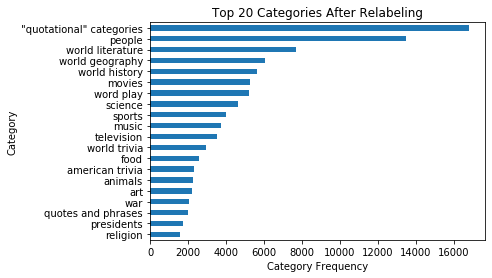

In [30]:
#print('Top 20 categories after extensive relabeling')
ax = csv_data['Category'].value_counts().head(20).plot.barh()
ax.set_title('Top 20 Categories After Relabeling')
ax.set_xlabel('Category Frequency')
ax.set_ylabel('Category')
plt.gca().invert_yaxis()

In [31]:
print('Number of unique categories after relabeling:', len(csv_data['Category'].value_counts()))

Number of unique categories after relabeling: 15486


While this may generalize the categories, it still leaves us with approximately __15,000__ compared to the original __27,000__ we started with. Another issue is that some top categories like __"quotational" cateogories__ become too large because we are only detecting for the presence of quotes. As shown, there are too many unique categories to label and some categories become inflated.

#### The more if-statements we added, the more bias became an issue in relabeling.

# Ethics & Privacy

- In this project, we did not use Jeopardy videos, which are publicly available, leading us to believe that there are no contestant privacy concerns. In the dataset we looked at, there is also no identifying information within the questions, answers, air date, and category columns. This project is mainly focused on the questions, categories and correct answers, all of which are directly unrelated to any previous contestants on Jeopardy. Additionally, this data would come from Jeopardy episodes that have already been released (1984-2011) so our analysis would have no effect on “spoiling” the show. Upon looking through and analyzing the data, we found that data is unequally collected from each year of Jeopardy. 

- In regards to how this study may affect the future, the results of this analysis could impact potential contestants of the show. Because we primarily looked at the possible Jeopardy categories, this information could provide topics and categories that they should study before appearing on the show. By being better prepared for specific topics, a potential contestant might be able to earn more points and win the show. On the other hand, the resulting topics provided by this analysis could mislead a potential contestant and cause them to study for topics which may not appear as frequently the year they compete.


# Conclusion & Discussion

Due to the nature of the show, categories could not repeat consistently or else contestants would be extremely prepared going into the show if they knew the trend or repetition of categories. To keep contestants applying to and participating in the show, but also limiting the amount of money they’re able to win, is a tactic that producers of the show want to maintain. 

#### To conclude, we cannot effectively identify categories that could appear on episodes for potential contestants to study.

### Limitations
A major limitation we ran into that made it difficult to analyze the data was the huge number of categories found in this dataset. To help our analysis, we originally planned to approach this issue with a relabeling method of organization where we coded several if statements in an attempt to find common or more general keywords in the original category names and recategorize our data based on those if statements. However, we decided to forego that approach because 1) the code itself took a long time to run and 2) we concluded this approach may not be the best way to arrive at an answer to our research question due to added bias.
- Creating a block of code full of if, elif, and else statements was eventually scrapped because doing so essentially hardcoded our data, and led to an element of bias based on the common keywords we looked for.


# Team Contributions

Patricia - overview, background, hypothesis, analysis, ethics, conclusion

Samantha - overview, background, hypothesis, analysis, ethics, conclusion

Marcus - data cleaning, background, hypothesis, analysis, ethics, conclusion

Gavin - data cleaning, background, hypothesis, analysis, ethics, conclusion